In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')  # style in matplotlib

In [3]:
# Bật tính năng để tắt các cảnh báo đi
import warnings
warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv('Báo cáo KH.csv ')
df.shape

(420302, 28)

In [5]:
# Làm sạch dữ liệu 
df = df.dropna(how='all')

In [6]:
df.describe()

,SL mua,Doanh thu,SL trả,Giá trị trả,Doanh thu thuần,SL mua chi tiết,Doanh thu chi tiết,SL trả chi tiết,Giá trị trả chi tiết,Doanh thu thuần chi tiết,Năm,Ngày,Giờ,SL,Đơn giá,Chiết khấu,Thành tiền
count,420302.000000,4.203020e+05,420302.000000,4.203020e+05,4.203020e+05,420302.000000,4.203020e+05,420302.000000,4.203020e+05,4.203020e+05,420302.000000,420302.000000,420302.000000,420302.000000,4.203020e+05,420302.000000,4.203020e+05
mean,57.090249,6.198599e+06,0.892044,-2.156902e+05,5.982909e+06,1.771764,2.440073e+05,0.139666,-3.462539e+04,2.093819e+05,2018.777403,15.631698,11.523890,0.911713,2.150420e+05,-22500.068660,1.983609e+05
std,493.555192,4.460511e+07,4.205933,9.760142e+05,4.379493e+07,37.990376,1.797811e+05,0.399498,1.024699e+05,1.856292e+05,1.297360,8.656849,5.633024,0.961871,1.849795e+05,47781.301873,1.799755e+05
min,0.000000,0.000000e+00,0.000000,-1.564900e+07,-5.244000e+06,0.000000,-2.000000e+00,0.000000,-2.000000e+06,-7.478873e+05,2016.000000,1.000000,0.000000,-12.000000,-2.000000e+06,-900000.000000,-2.000000e+06
25%,2.000000,3.500000e+05,0.000000,0.000000e+00,3.200000e+05,1.000000,1.276160e+05,0.000000,0.000000e+00,7.000000e+04,2018.000000,8.000000,9.000000,1.000000,7.500000e+04,-25834.750000,7.000000e+04
50%,3.000000,6.500000e+05,0.000000,0.000000e+00,5.920000e+05,1.000000,2.608700e+05,0.000000,0.000000e+00,2.250000e+05,2019.000000,16.000000,13.000000,1.000000,2.800000e+05,0.000000,2.380000e+05
75%,6.000000,1.200000e+06,0.000000,0.000000e+00,1.070000e+06,1.000000,3.300000e+05,0.000000,0.000000e+00,3.200000e+05,2020.000000,23.000000,15.000000,1.000000,3.450000e+05,0.000000,3.200000e+05
max,6049.000000,4.600880e+08,96.000000,0.000000e+00,4.531430e+08,2981.000000,9.660000e+06,17.000000,0.000000e+00,9.660000e+06,2020.000000,31.000000,23.000000,202.000000,2.000000e+06,1.000000,4.160000e+06


In [7]:
df.columns

Index(['Mã KH', 'Khu vực (Tỉnh)', 'Khu vực tỉnh Hà Nội', 'Nhóm khách hàng',
       'SL mua', 'Doanh thu', 'SL trả', 'Giá trị trả', 'Doanh thu thuần',
       'Mã hàng', 'Tên hàng', 'SL mua chi tiết', 'Doanh thu chi tiết',
       'SL trả chi tiết', 'Giá trị trả chi tiết', 'Doanh thu thuần chi tiết',
       'Mã phiếu', 'Chi nhánh', 'Thời gian', 'Năm', 'Tháng', 'Ngày', 'Thứ',
       'Giờ', 'SL', 'Đơn giá', 'Chiết khấu', 'Thành tiền'],
      dtype='object')

# Doanh thu thuần từ năm 2016 ---> 2020

In [8]:
#df['Doanh thu thuần'] = np.log2(df['Doanh thu thuần'])

In [9]:
kq1 = df.groupby(['Năm', 'Chi nhánh'])['Doanh thu thuần'].sum()
id_df = pd.DataFrame(kq1)
id_df

Doanh thu thuần
Năm  Chi nhánh                                 
2016 Online                         26349940540
2017 Online                         43725373127
2018 Cửa hàng  Kim Mã                3764108000
     Cửa hàng  Phạm Ngọc Thạch     109578640052
     Online                         42461784391
2019 Cửa hàng  Kim Mã              356659157542
     Cửa hàng  Phạm Ngọc Thạch     737659037300
     Cửa hàng  Thái Hà             117970786700
     Online                         84597620906
2020 Cửa hàng  Cầu Giấy            112001188779
     Cửa hàng  Kim Mã              267490508617
     Cửa hàng  Phạm Ngọc Thạch     193091453687
     Cửa hàng  Thái Hà             210969282525
     Online                        208309542364

In [10]:
kq2 = df.groupby('Năm').sum()['Doanh thu thuần']
id_df2 = pd.DataFrame(kq2)
id_df2.reset_index(inplace = True)
id_df2

,Năm,Doanh thu thuần
0,2016,26349940540
1,2017,43725373127
2,2018,155804532443
3,2019,1296886602448
4,2020,991861975972


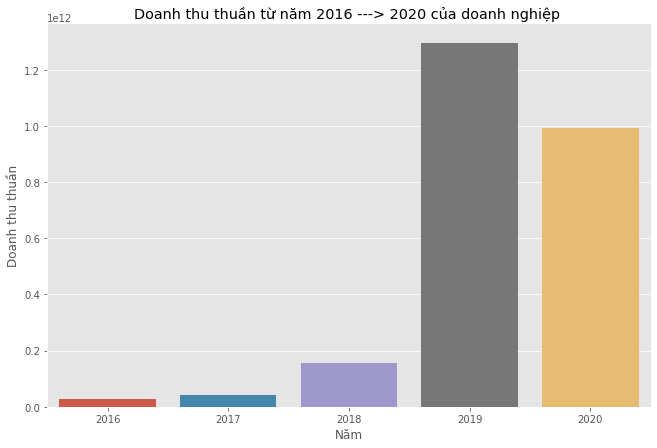

In [11]:
sns.catplot(x = 'Năm', y = 'Doanh thu thuần', data= id_df2, kind= 'bar',height=6,aspect=1.5)
plt.title("Doanh thu thuần từ năm 2016 ---> 2020 của doanh nghiệp ");

# Tốc độ phát triển của các chi nhánh

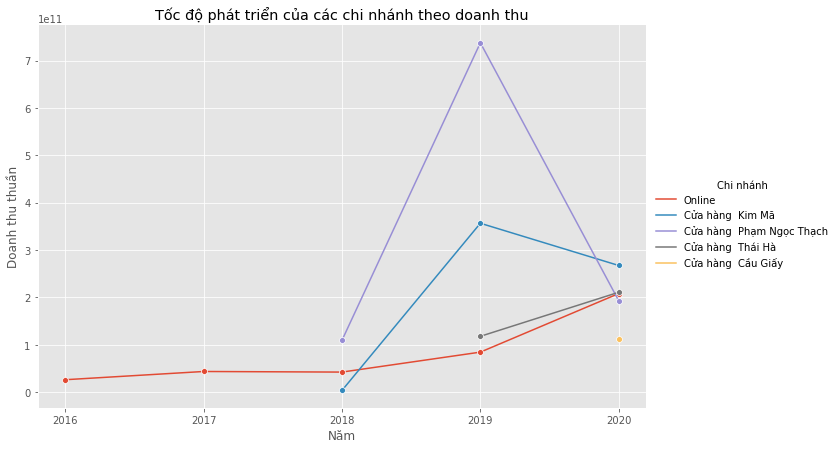

In [12]:
sns.relplot(x='Năm',y='Doanh thu thuần',kind='line',data=id_df, hue='Chi nhánh',height=6,aspect=1.5, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.title("Tốc độ phát triển của các chi nhánh theo doanh thu");

# 10 tỉnh có số lượng mua nhiều nhất

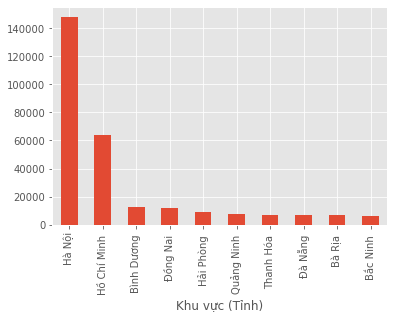

In [13]:
tinh_df = df.groupby('Khu vực (Tỉnh)').count()['SL mua chi tiết'].sort_values(ascending=False).head(10)
tinh_df.plot(kind = 'bar');

# 10 sản phẩm có số lượng mua nhiều nhất

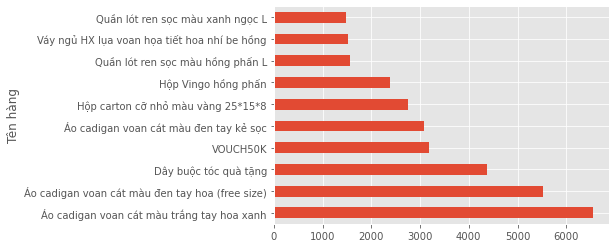

In [14]:
hang_df = df.groupby('Tên hàng').count()['SL mua chi tiết'].sort_values(ascending=False).head(10)
hang_df.plot(kind='barh');

# Phần trăm khách hàng từ các chi nhánh

In [15]:
# groupby -> dataFrame
number = df.groupby('Chi nhánh').count()['Mã KH']
number_df = pd.DataFrame(number)
number_df

,Mã KH
Chi nhánh,
Cửa hàng Cầu Giấy,4939
Cửa hàng Kim Mã,17097
Cửa hàng Phạm Ngọc Thạch,33861
Cửa hàng Thái Hà,14277
Online,350128


In [16]:
# Chuyển dạng O ---> int
number_df['Mã KH'].astype(str).astype('int64')

Chi nhánh
Cửa hàng  Cầu Giấy             4939
Cửa hàng  Kim Mã              17097
Cửa hàng  Phạm Ngọc Thạch     33861
Cửa hàng  Thái Hà             14277
Online                       350128
Name: Mã KH, dtype: int64

In [17]:
# Tính phần trăm theo số lượng khách hàng!
percentage = []
total_cus = number_df['Mã KH'].sum()
for i in range(number_df.shape[0]):
    pct = (number_df['Mã KH'][i] / total_cus) * 100
    percentage.append(round(pct,2))
number_df['Percentage'] = percentage
number_df

,Mã KH,Percentage
Chi nhánh,,
Cửa hàng Cầu Giấy,4939,1.18
Cửa hàng Kim Mã,17097,4.07
Cửa hàng Phạm Ngọc Thạch,33861,8.06
Cửa hàng Thái Hà,14277,3.40
Online,350128,83.30


In [18]:
# reset_index --> truy suất col và trưc quan sns
number_df.reset_index(inplace=True)
number_df

,Chi nhánh,Mã KH,Percentage
0,Cửa hàng Cầu Giấy,4939,1.18
1,Cửa hàng Kim Mã,17097,4.07
2,Cửa hàng Phạm Ngọc Thạch,33861,8.06
3,Cửa hàng Thái Hà,14277,3.40
4,Online,350128,83.30


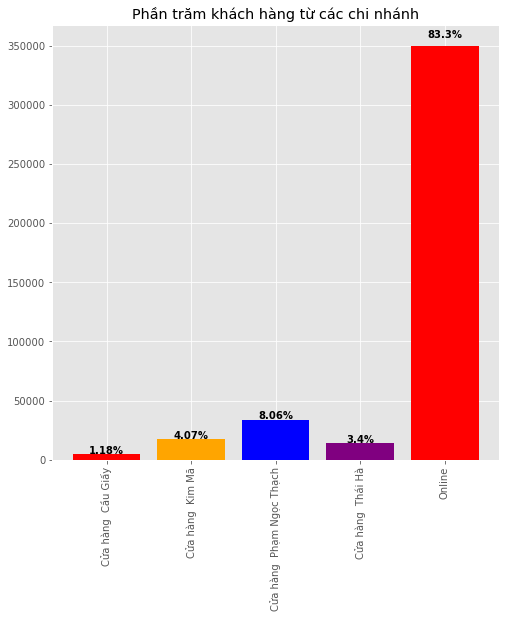

In [19]:
percentage = []
total_cus = number_df['Mã KH'].sum()
for i in range(number_df.shape[0]):
    pct = (number_df['Mã KH'][i] / total_cus) * 100
    percentage.append(round(pct,2))
number_df['Percentage'] = percentage
 
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(number_df['Chi nhánh'],number_df['Mã KH'], color = colors_list)
plt.title('Phần trăm khách hàng từ các chi nhánh')
    
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(number_df.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xticks(rotation=90);

In [20]:
df = pd.read_csv('Đơn hàng.csv ')
df.head()

,Chi nhánh,Mã hóa đơn,Thời gian tạo,Năm,Tháng,Ngày,Thứ,Giờ,Mã trả hàng,Mã khách hàng,...,Giảm giá hóa đơn,Tổng tiền hàng sau giảm giá hoá đơn,Mã hàng,Tên hàng,Số lượng,Đơn giá,Giảm giá,Giá bán,Thành tiền,Thời gian
0,Online,HD145457,31/01/2020 16:40:55,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5826594325,...,0,345000,VG74BHL,váy ngủ lụa voan hoa nhí HX 2 tầng chân ren be...,1,345000,0,345000,345000,31/01/2020
1,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H133DEL,Bộ pjjama TCQD Lụa HX in trái tim đỏ màu đen L,1,395000,0,395000,395000,31/01/2020
2,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H071TL,Bộ Pijama TCQD lụa HX trơn quả đào trắng L,1,395000,0,395000,395000,31/01/2020
3,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H072TL,Bộ Pijama TCQD HX tim xanh đỏ màu trắng L,1,395000,0,395000,395000,31/01/2020
4,Online,HD145455,31/01/2020 16:30:34,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5826594324,...,0,510000,GC01DEXL,Sét bộ gym 3 mảnh cộc áo lưới đen XL,1,350000,0,350000,350000,31/01/2020


In [21]:
df.shape

(356606, 25)

In [22]:
df.describe()

,Năm,Ngày,Giờ,Tổng tiền hàng,Giảm giá hóa đơn,Tổng tiền hàng sau giảm giá hoá đơn,Số lượng,Đơn giá,Giảm giá,Giá bán,Thành tiền
count,356606.000000,356606.000000,356606.000000,3.566060e+05,3.566060e+05,3.566060e+05,356606.000000,3.566060e+05,356606.000000,3.566060e+05,3.566060e+05
mean,2018.664658,15.677936,14.237192,7.266373e+05,5.865259e+04,6.679847e+05,1.036146,2.487334e+05,2044.397458,2.466890e+05,2.515096e+05
std,1.297546,8.708291,3.608159,1.210028e+06,2.159685e+05,1.114096e+06,0.357209,1.323596e+05,19507.867460,1.338176e+05,1.411712e+05
min,2016.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2018.000000,8.000000,11.000000,3.350000e+05,0.000000e+00,3.200000e+05,1.000000,1.500000e+05,0.000000,1.400000e+05,1.500000e+05
50%,2019.000000,16.000000,15.000000,5.550000e+05,0.000000e+00,5.100000e+05,1.000000,2.800000e+05,0.000000,2.800000e+05,2.800000e+05
75%,2020.000000,23.000000,16.000000,8.400000e+05,6.000000e+04,7.880000e+05,1.000000,3.500000e+05,0.000000,3.500000e+05,3.500000e+05
max,2020.000000,31.000000,23.000000,3.838800e+07,7.800000e+06,3.838800e+07,63.000000,2.000000e+06,900000.000000,2.000000e+06,5.400000e+06


# Tốc độ phát triển của các kênh bán theo tổng tiền hàng

In [23]:
kq1 = df.groupby(['Năm', 'Kênh bán'])[
    'Tổng tiền hàng sau giảm giá hoá đơn'].sum()
id_df = pd.DataFrame(kq1)

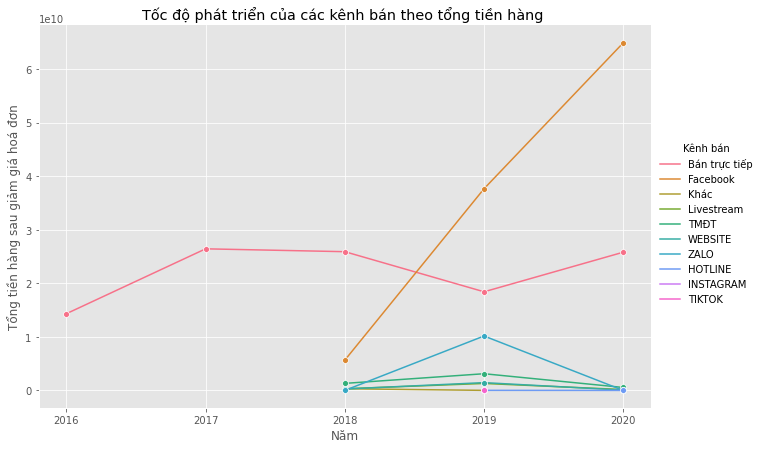

In [24]:
sns.relplot(x='Năm', y='Tổng tiền hàng sau giảm giá hoá đơn', kind='line',
            data=id_df, hue='Kênh bán', height=6, aspect=1.5, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.title("Tốc độ phát triển của các kênh bán theo tổng tiền hàng ");

# Giá bán so vs giảm giá, số lượng

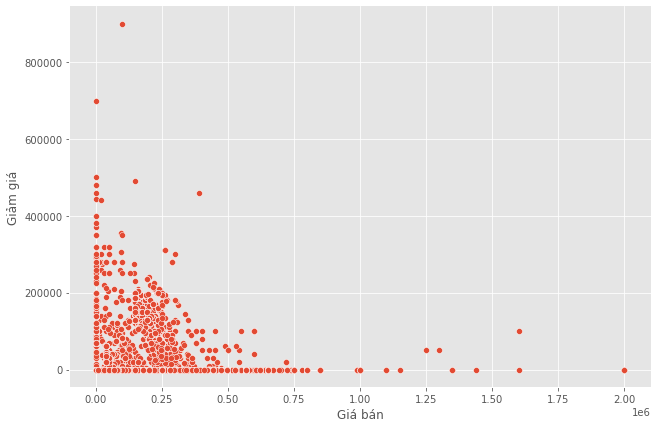

In [25]:
# Giá bán so vs giảm giá
sns.relplot(x='Giá bán', y='Giảm giá', data=df, height=6, aspect=1.5);

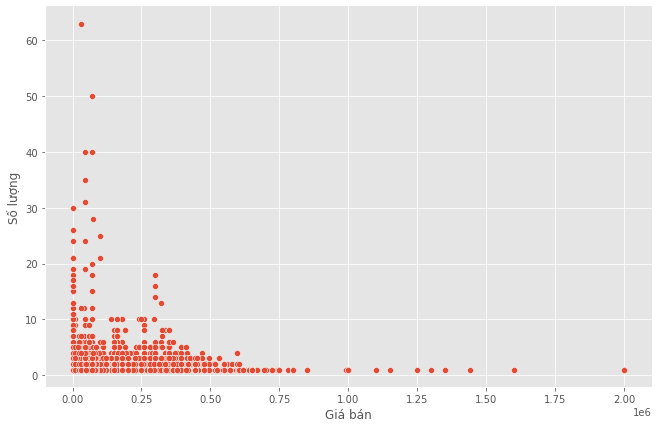

In [26]:
# Giá bán so vs số lượng
sns.relplot(x='Giá bán', y='Số lượng', data=df, height=6, aspect=1.5);

- Giá bán so vs giảm giá và số lượng, chúng có quan hệ tuyến tính với nhau

# Phần trăm khách hàng từ các Kênh bán

In [27]:
number = df.groupby('Kênh bán').count()['Mã khách hàng']
number_df = pd.DataFrame(number)
number_df

,Mã khách hàng
Kênh bán,
Bán trực tiếp,177134
Facebook,152756
HOTLINE,30
INSTAGRAM,1
Khác,408
Livestream,2975
TIKTOK,8
TMĐT,13850
WEBSITE,2632


In [28]:
percentage = []
total_cus = number_df['Mã khách hàng'].sum()
for i in range(number_df.shape[0]):
    pct = (number_df['Mã khách hàng'][i] / total_cus) * 100
    percentage.append(round(pct, 2))
number_df['Percentage'] = percentage
number_df.reset_index(inplace=True)
number_df

,Kênh bán,Mã khách hàng,Percentage
0,Bán trực tiếp,177134,50.52
1,Facebook,152756,43.57
2,HOTLINE,30,0.01
3,INSTAGRAM,1,0.00
4,Khác,408,0.12
5,Livestream,2975,0.85
6,TIKTOK,8,0.00
7,TMĐT,13850,3.95
8,WEBSITE,2632,0.75
9,ZALO,837,0.24


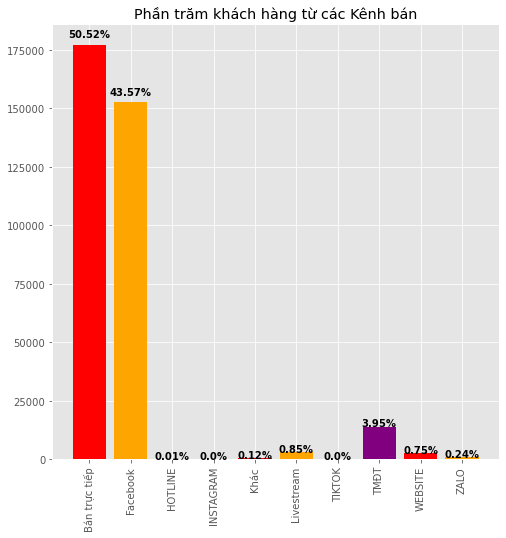

In [29]:
percentage = []
total_cus = number_df['Mã khách hàng'].sum()
for i in range(number_df.shape[0]):
    pct = (number_df['Mã khách hàng'][i] / total_cus) * 100
    percentage.append(round(pct, 2))
number_df['Percentage'] = percentage

# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['Red', 'Orange', 'Blue', 'Purple']
graph = plt.bar(number_df['Kênh bán'],
                number_df['Mã khách hàng'], color=colors_list)
plt.title('Phần trăm khách hàng từ các Kênh bán')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(number_df.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.xticks(rotation=90);

# Các sản phẩm thường bán cùng nhau

In [30]:
# Các sản phẩm thường bán cùng nhau
df_dup = df[df['Mã hóa đơn'].duplicated(keep=False)]
df_dup.head(5)

,Chi nhánh,Mã hóa đơn,Thời gian tạo,Năm,Tháng,Ngày,Thứ,Giờ,Mã trả hàng,Mã khách hàng,...,Giảm giá hóa đơn,Tổng tiền hàng sau giảm giá hoá đơn,Mã hàng,Tên hàng,Số lượng,Đơn giá,Giảm giá,Giá bán,Thành tiền,Thời gian
1,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H133DEL,Bộ pjjama TCQD Lụa HX in trái tim đỏ màu đen L,1,395000,0,395000,395000,31/01/2020
2,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H071TL,Bộ Pijama TCQD lụa HX trơn quả đào trắng L,1,395000,0,395000,395000,31/01/2020
3,Online,HD145456,31/01/2020 16:34:23,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5820548,...,0,1185000,H072TL,Bộ Pijama TCQD HX tim xanh đỏ màu trắng L,1,395000,0,395000,395000,31/01/2020
4,Online,HD145455,31/01/2020 16:30:34,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5826594324,...,0,510000,GC01DEXL,Sét bộ gym 3 mảnh cộc áo lưới đen XL,1,350000,0,350000,350000,31/01/2020
5,Online,HD145455,31/01/2020 16:30:34,2020,Tháng Một,31,Thứ Sáu,16,NaN,KH5826594324,...,0,510000,G026GXL,Áo tập gym lưới lưng ghi XL,1,160000,0,160000,160000,31/01/2020


In [31]:
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby(
    'Mã hóa đơn')['Tên hàng'].transform(groupProduct)
df_dup = df_dup[['Mã hóa đơn', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

Áo cadigan voan cát màu trắng tay hoa xanh, Áo cadigan voan cát màu đen tay hoa (free size)              1352
Áo cadigan voan cát màu trắng tay hoa xanh, Áo cadigan voan cát màu đen tay kẻ sọc                        386
Áo cadigan voan cát màu đen tay hoa (free size), Áo cadigan voan cát màu đen tay kẻ sọc                   243
Áo cadigan voan cát màu đen tay kẻ sọc, Áo cadigan voan cát màu trắng tay hoa xanh                        139
Áo cadigan chất chifon họa tiết hoa thêu màu đen XL, Váy mặc set kimono màu đen XL, Khuy cài hình hoa     135
Áo cadigan voan cát màu đen tay hoa (free size), Áo cadigan voan cát màu trắng tay hoa xanh               114
Áo cadigan voan cát màu đen tay kẻ sọc, Áo cadigan voan cát màu đen tay hoa (free size)                    99
Áo gym bra hồng tím M, Quần tập gym cạp cao hồng tím M                                                     86
Combo 5 quần chip viền ren nơ size L, Combo 5 quần chip viền ren nơ size L                                 86
Áo gym cro

# Thời gian ảnh hưởng đến số lượng bán

In [32]:
# Tháng nào có số lượng bán nhiều nhất
df.groupby('Tháng').sum()['Số lượng']

Tháng
Tháng Ba          23919
Tháng Bảy         33616
Tháng Chín        40684
Tháng Hai         19872
Tháng Mười        40256
Tháng Mười Hai    20030
Tháng Mười Một    18843
Tháng Một         20279
Tháng Năm         42338
Tháng Sáu         43523
Tháng Tám         35817
Tháng Tư          30319
Name: Số lượng, dtype: int64

In [33]:
quatity_df = df.groupby('Tháng').sum()['Số lượng']
quatity_df.max()

43523

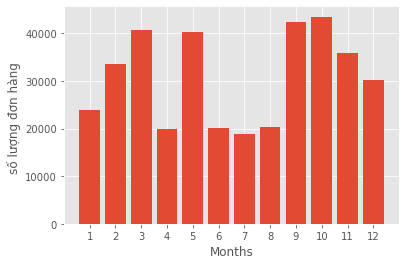

In [34]:
months = range(1, 13)
plt.bar(x=months, height=quatity_df)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('số lượng đơn hàng ')
plt.show()

# khung giờ khách hàng hay mua, phục vụ cho chiến lược quản cáo

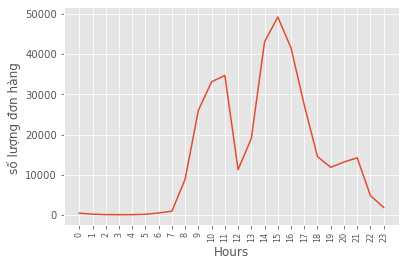

In [35]:
# khung giờ khách hàng hay mua, phục vụ cho chiến lược quản cáo
sales_value_hours = df.groupby('Giờ').count()['Số lượng']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('số lượng đơn hàng ');

In [36]:
df = pd.read_csv('Trả hàng.csv ')
df.head()

,Chi nhánh,Mã trả hàng,Thời gian tạo,Mã hóa đơn,Mã khách hàng,Kênh bán,Ghi chú,Tổng tiền hàng trả,Giảm giá phiếu trả,Tổng tiền hàng trả sau giảm giá,Mã hàng,Tên hàng,Số lượng,Giá bán,Giá nhập lại
0,Online,TH014992,30/04/2020 15:44:29,HD163120,KH5826606648,Facebook,Đổi hàng,"630,000",0,"630,000",H069XNCL,Bộ ngủ TCQL ba lỗ nơ 2 bên HX màu xanh ngọc L,1,"315,000.0","315,000.0"
1,Online,TH014992,30/04/2020 15:44:29,HD163120,KH5826606648,Facebook,Đổi hàng,"630,000",0,"630,000",H069HCL,Bộ ngủ TCQL ba lỗ nơ 2 bên HX hồng cam L,1,"315,000.0","315,000.0"
2,Online,TH015893,29/06/2020 11:28:08,HD182475,KH5826619806,Facebook,Đổi hàng,"345,000",0,"345,000",BM63XDM,B họa tiết hạc xanh đậm M(),1,"345,000.0","345,000.0"
3,Online,TH004656,22/12/2017 16:17:11,HD047037,KH022108,Facebook,Đổi hàng,"540,000",0,"540,000",AM26TD36,Bộ lót ren trắng màu tím đậm có gọng đệm vừa s...,1,"270,000.0","270,000.0"
4,Online,TH004656,22/12/2017 16:17:11,HD047037,KH022108,Facebook,Đổi hàng,"540,000",0,"540,000",AM26DT36,Bộ lót ren trắng màu đỏ tươi có gọng đệm vừa s...,1,"270,000.0","270,000.0"


In [37]:
# Làm sạch dữ liệu 
df = df.dropna(how='all')

In [38]:
df.describe()

,Số lượng
count,29659.000000
mean,1.034526
std,0.280689
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,12.000000


In [39]:
# Tách năm
df['Year'] = df['Thời gian tạo'].str[6:10]
df.head()

,Chi nhánh,Mã trả hàng,Thời gian tạo,Mã hóa đơn,Mã khách hàng,Kênh bán,Ghi chú,Tổng tiền hàng trả,Giảm giá phiếu trả,Tổng tiền hàng trả sau giảm giá,Mã hàng,Tên hàng,Số lượng,Giá bán,Giá nhập lại,Year
0,Online,TH014992,30/04/2020 15:44:29,HD163120,KH5826606648,Facebook,Đổi hàng,"630,000",0,"630,000",H069XNCL,Bộ ngủ TCQL ba lỗ nơ 2 bên HX màu xanh ngọc L,1,"315,000.0","315,000.0",2020
1,Online,TH014992,30/04/2020 15:44:29,HD163120,KH5826606648,Facebook,Đổi hàng,"630,000",0,"630,000",H069HCL,Bộ ngủ TCQL ba lỗ nơ 2 bên HX hồng cam L,1,"315,000.0","315,000.0",2020
2,Online,TH015893,29/06/2020 11:28:08,HD182475,KH5826619806,Facebook,Đổi hàng,"345,000",0,"345,000",BM63XDM,B họa tiết hạc xanh đậm M(),1,"345,000.0","345,000.0",2020
3,Online,TH004656,22/12/2017 16:17:11,HD047037,KH022108,Facebook,Đổi hàng,"540,000",0,"540,000",AM26TD36,Bộ lót ren trắng màu tím đậm có gọng đệm vừa s...,1,"270,000.0","270,000.0",2017
4,Online,TH004656,22/12/2017 16:17:11,HD047037,KH022108,Facebook,Đổi hàng,"540,000",0,"540,000",AM26DT36,Bộ lót ren trắng màu đỏ tươi có gọng đệm vừa s...,1,"270,000.0","270,000.0",2017


In [40]:
# Thay đổi định dạng 
df['Tổng tiền hàng trả'] = df['Tổng tiền hàng trả'].str.replace(r',', '')
df['Tổng tiền hàng trả'] =df['Tổng tiền hàng trả'].astype(str).astype(int)

In [41]:
kq2 = df.groupby('Year').sum()['Số lượng']
id_df2 = pd.DataFrame(kq2)
id_df2.reset_index(inplace = True)
id_df2

,Year,Số lượng
0,2016,2934
1,2017,3169
2,2018,4529
3,2019,7026
4,2020,13025


# Số lượng trả lại hàng từ năm 2016 ---> 2020

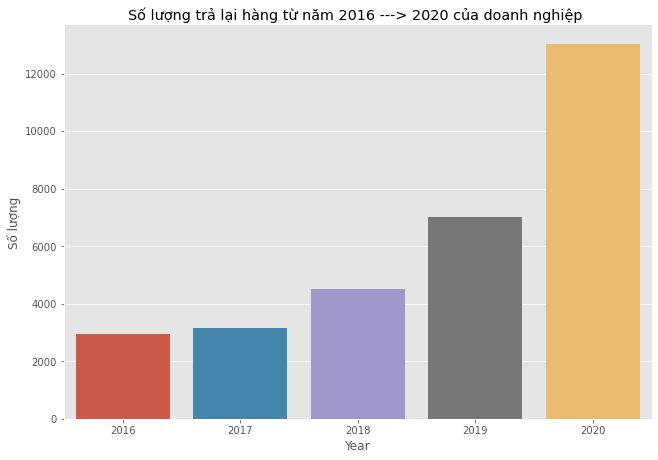

In [42]:
sns.catplot(x = 'Year', y = 'Số lượng', data= id_df2, kind= 'bar',height=6,aspect=1.5)
plt.title("Số lượng trả lại hàng từ năm 2016 ---> 2020 của doanh nghiệp ");

# Số lượng hàng trả về của các kênh bán

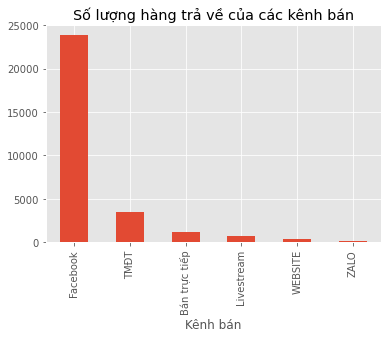

In [43]:
kenh_df = df.groupby('Kênh bán').count()['Số lượng'].sort_values(ascending=False).head(6)
kenh_df.plot(kind = 'bar');
plt.title("Số lượng hàng trả về của các kênh bán");

# Tên hàng cùng lượng hàng trả về nhiều nhất!

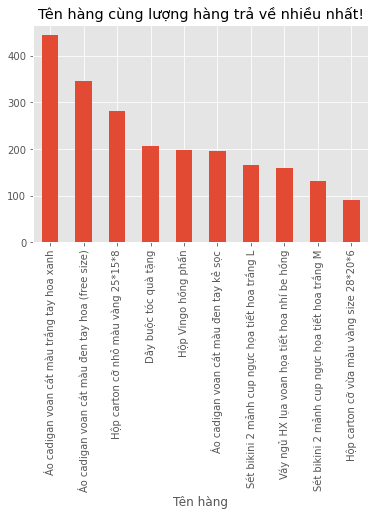

In [44]:
kenh_df = df.groupby('Tên hàng').count()['Số lượng'].sort_values(ascending=False).head(10)
kenh_df.plot(kind = 'bar');
plt.title("Tên hàng cùng lượng hàng trả về nhiều nhất!");

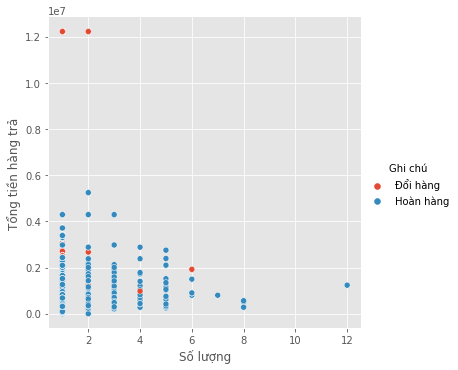

In [45]:
sns.relplot(x='Số lượng', y='Tổng tiền hàng trả', data=df, hue='Ghi chú');